In [1]:
import numpy as np
import matplotlib.pyplot as plt
from postprocess import stitch_corr_matrix
import h5py
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri
import pywt

In [2]:
# Grab a time series:
f = h5py.File('RM1_p45_day4_trial_1_PAINT.mat', 'r')

In [33]:
dat =  f[f['cfg_PAINT_cond']['ChanTEP'][0][0]]
ersp = f[f['cfg_PAINT_cond']['ChanERSP'][0][0]]

In [6]:
freqs = f['cfg_PAINT_cond']['ERSPfreq'][:]

In [29]:
# Wavelet transform a single channels timeseries:
# Do a separate transform for each frequency:

# Fixed scaling factor of 6, bandwidth 
wt = np.zeros((dat.shape[0], len(freqs)), dtype=np.complex_)
wt_freqs = np.zeros(freqs.size)
for i, freq in enumerate(freqs):
    cwtrans = pywt.cwt(dat[:, 0], 6, "cmor1.0-%f" % freq, sampling_period = 0.001)
    wt[:, i] = cwtrans[0].ravel()
    wt_freqs[i] = cwtrans[1]

In [30]:
wt_freqs

array([ 864.58333333, 1000.        , 1197.91666667, 1333.33333333,
       1531.25      , 1666.66666667, 1864.58333333, 2000.        ,
       2197.91666667, 2333.33333333, 2531.25      , 2666.66666667,
       2864.58333333, 3000.        , 3208.33333333, 3333.33333333,
       3541.66666667, 3666.66666667, 3875.        , 4000.        ,
       4208.33333333, 4333.33333333, 4541.66666667, 4666.66666667,
       4875.        , 5000.        , 5208.33333333, 5322.91666667,
       5125.        , 4989.58333333, 4791.66666667, 4656.25      ,
       4458.33333333, 4322.91666667, 4125.        , 3989.58333333,
       3791.66666667, 3656.25      , 3458.33333333, 3322.91666667,
       3125.        , 2989.58333333, 2791.66666667, 2656.25      ,
       2458.33333333, 2322.91666667, 2125.        , 1989.58333333,
       1791.66666667, 1656.25      , 1458.33333333])

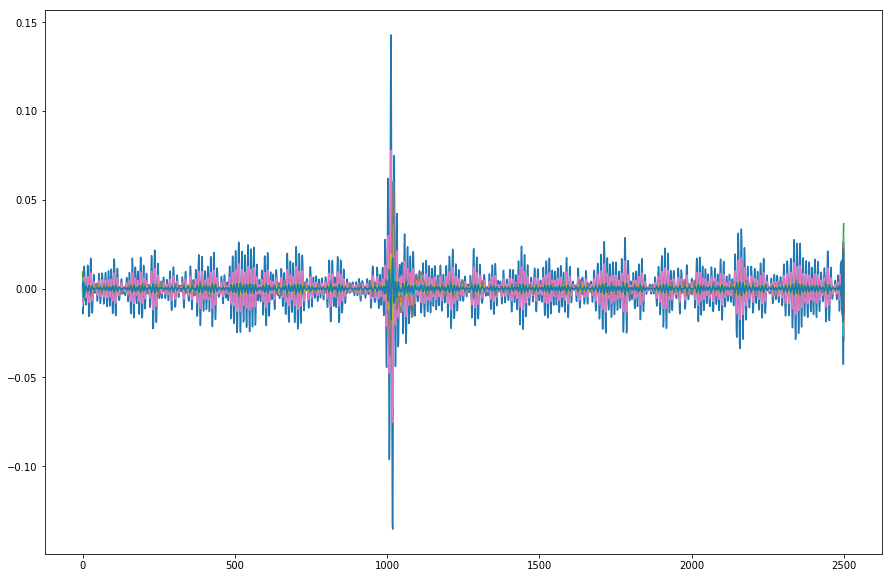

In [31]:
plt.figure(figsize = (15, 10))
plt.plot(wt)

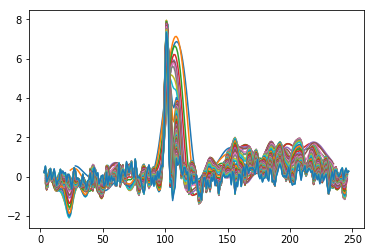

In [35]:
plt.plot(ersp[:, :, 0])

In [ ]:
f, t, Zxx = signal.stft(x, 1000, nperseg=350)

In [36]:
f

<HDF5 file "RM1_p45_day4_trial_1_PAINT.mat" (mode r)>

In [ ]:
plt.plot(abs(Zxx[])